![](https://previews.dropbox.com/p/thumb/AA91sZ6OYI3WIlX2qXF7BEpb9HfJ0HLv4oyEdtrUqcF32KNzEr89GpDUs0jBeejhnTRx-nVue7q_SvIKiOYu3lfVtRO-zW1tSxXOYJms-oNqcFZOJkL8x46GK0RJj2dijCUMAUQfBjbj3gI2sN7gmljRoIkGSDgwjq2vy4XTbIwxR2XyJ8Omdl3-xsfHVJtf1t-_1P-outH2mUbVqQjMDyjug0GNd0zatlOtLdxQlrhid6iCyWwAZY5IWLF8jNISJdRpKPCP-PDk7_HJqlHGfx6WAG0FQ1S5j2o6_gg7oub7iMqFrBCSaxe73JJZJXjdqmPOsXbEm5gFrAvKZdGkdWM-ERjjV3qHD1ZfGdb9RI2EjQ/p.png?fv_content=true&size_mode=5)

## Instructors
* Nguyễn Hoàng Phương  - Data Scientist từ Torus-Actions

# Phần I - Tuần 2:    Bài toán Regression -  xây dựng mô hình dự đoán giá nhà 
![home price](https://previews.dropbox.com/p/thumb/AA9MmKl9bF1rSh89ydiZwEuix6sWd0ij8dnE9zCReFMqdbHqwTQ-uD9UMKWAu5Qdk6FwMzHh3EGvuLjqeNtaJYJw9K5ltpl0teGnCAgRbIpdflVjX_6zN38xgDT50LpFseQ_QCdG0WaOhv09xvAGZNAJLOk3ckn3jJNbJUx0iRpluj_HeBkJ62sn--J6if0rnjWaAJhndytzyrG58O56yhtSPQcSqLDrdxvYC9hZ8J6DYM6I6efeFajoEGfzC9JmC8J1b577ixKxuwDCoIWv-_qNHAlxDln96FNI7iptWYN5ov9e56Ez6KqPLxgtqnCHWjx2Tdylv7bLF3zDYh6fK4vLfkXhcXtSJX7Y3Zb3k3fZrQ/p.png?fv_content=true&size_mode=5)


## Outline
- <a href='#1'>1. Xử lý dữ liệu  </a>
    - <a id='#1-1'>1.1. Xử lý dữ liệu thiếu (missing data) </a> 
    - <a id='#1-1'>1.2. Xử lý dữ liệu số  </a> 
    - <a id='#1-1'>1.3. Xử lý dữ liệu phân loại  </a>

- <a href='#2'>2. Thuật toán lightgbm và tối ưu bayes (bayesian optimization)  </a>  
    - <a id='#2-1'>2.1. Thuật toán lightgbm và các tham số quan trọng </a> 
    - <a id='#2-1'>2.2. Tối ưu Bayes (Bayesian optimization) </a> 
    - <a id='#2-1'>3.1. Sử dụng tối ưu bayes để tối ưu tham số thuật toán lightgbm </a>


Nhập các gói thư viện 

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import sys
import os
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

Đọc dữ liệu 

In [2]:
train = pd.read_csv('./data/house-prices/train.csv')
test  = pd.read_csv('./data/house-prices/test.csv')

In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# <a id='1'>1. Feature engineering </a>

### Feature engineeing tuần 1: 
   +  Xóa các hàng dữ liệu bất thường (là các hàng dữ liệu có diện tích lớn hơn 4000 và giá nhà bé hơn 200.000)
   +  Xử lý dữ liệu thiếu: 
        + Thay giá trị NaN ở các trường có tỷ lệ thấp bằng giá trị phân loại có tần suất xuất hiện cao nhất
        + Điền NaN ở trường numeric bằng giá trị  0, điền NaN ở các trường phân loại bằng giá trị "None"
   +  Xử lý dữ liệu số : 
        + Log transform các cột dữ liệu có giá trị lớn
        + Xử lý các cột dữ liệu thời gian (cột năm xây dựng => cột thời gian sử dụng, tính tới năm 2018)
   +  Xử lý dữ liệu phân loại: 
        + One hot encoding tất cả trường phân loại 

### ==>> Kết quả RMSLE trên cross-validation đạt: 0.121

### Feature engineering tuần 2: 
Ở tuần thứ hai, chúng ta tìm hiểu sâu hơn data, từ đó đề xuất những phương pháp xử lý data phù hợp hơn cho mỗi trường dữ liệu. 
### Tổng quan các bước xử lý data: 
   +  Xóa các hàng dữ liệu bất thường (là các hàng dữ liệu có diện tích lớn hơn 4.000 và giá nhà thấp hơn 200.000)
   +  Xử lý dữ liệu thiếu: 
        +  Tạo cột dữ liệu mới tương ứng với NaN hoặc không Nan tương ứng với các cột dữ liệu thiếu 
        +  Qua tìm hiểu ý nghĩa của giá trị thiếu ở mỗi trường dữ liệu, điền NaN bằng các số liệu thích hợp hơn.
   +  Xử lý dữ liệu dạng số : 
        +  Giới thiệu phép biến đổi mới (box-cox) để chuẩn hóa những dữ liệu skewed. 
        +  Xử lý các cột dữ liệu thời gian (cột năm xây dựng => cột thời gian sử dụng, tính tới năm 2018)
        +  Tạo những cộ dữ liệu mới. 
   +  Xử lý dữ liệu phân loại: 
        + Lable encoding những trường dữ liệu mang tính chất thứ tự. Ví dụ: ở trường dữ liệu "ExterCond" có các giá trị phân loại 
          + Ex	Excellent       -->5
          + Gd	Good            -->4
          + TA	Average/Typical -->3
          + Fa	Fair            -->2
          + Po	Poor            -->1
        + One hot encoding các trường dữ liệu phân loại còn lại 

# <a id='1.1*'>1.1*. Xóa các cột dữ liệu bất thường </a>

Như đã nhận xét ở tuần trước,  các hàng dữ liệu bất thường gây ra hiện tượng underfitting, việc xóa các hàng này sẽ giúp cho việc xây dựng mô hình bằng phương pháp cross validation có độ tin tưởng cao hơn. 


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

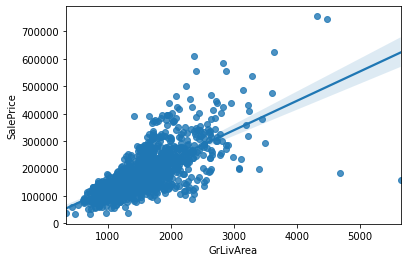

In [4]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
#scatter plot
sns.regplot(data = train, x= var, y="SalePrice")
#plt.scatter(train[var], train['SalePrice']);

In [5]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index)

In [6]:
ntrain = train.shape[0]
ntest = test.shape[0]
target = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice', 'Id'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (2917, 79)


# <a id='1.2*'>1.2*. Xử lý data thiếu </a>

In [7]:
def missing_values_table(df):
        # Total missing values
    mis_val = df.isnull().sum()        
        # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)     
        # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)     
        # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})      
        # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)      
    return mis_val_table_ren_columns

In [8]:
missing_values_table(data).head(10)

,Missing Values,% of Total Values
PoolQC,2908,99.7
MiscFeature,2812,96.4
Alley,2719,93.2
Fence,2346,80.4
FireplaceQu,1420,48.7
LotFrontage,486,16.7
GarageFinish,159,5.5
GarageQual,159,5.5
GarageCond,159,5.5
GarageYrBlt,159,5.5


#### Phân tích kĩ data và ý nghĩa các trường dữ liệu có thể nhận thấy:

 + Một số giá trị NaN được cố ý để trống vì không có thông tin thích hợp, ví dụ ở trường "Alley" (mô tả loại hẻm vào nhà), giá trị NaN nghĩa là không có hẻm trong ngôi nhà cụ thể đó.
 + Một số giá trị NaN được để thiếu để ám chỉ giá trị 0 (thường các trường liên quan đến diện tích, diện tích gara, ...). 
 


#### Chúng ta có 2 dạng giá trị NaN sau: 

 + Giá trị có NaN được cố ý để trống vì không có giá trị phù hợp: với các trường này chúng ta thay NaN bằng một giá trị mới là "None"

In [9]:
NaN_None_columns = ["Alley", "PoolQC", "MiscFeature","Fence",
                   "FireplaceQu","GarageType","GarageFinish",
                   "GarageQual","GarageCond",'BsmtQual','BsmtCond',
                    'BsmtExposure','BsmtFinType1','BsmtFinType2',
                    'MasVnrType']
## fill Nan the above columns by None
for feature in NaN_None_columns:
    data[feature]= data[feature].fillna("None")

 + Giá trị NaN xuất hiện ở trường diện tích vì nhà không phòng, gara , ....

In [10]:
NaN_zero_columns = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                    'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath', 
                    'GarageYrBlt','GarageArea','GarageCars',
                    'MasVnrArea']
## fill Nan the above columns by 0
for feature in NaN_zero_columns:
    data[feature]= data[feature].fillna(0)

#### Ngoài ra, dữ liệu thiếu của trường LotFrontage (khoảng cách từ nhà tới đường) được thay thế bằng khoảng cách trung bình của nhà xung quanh tới đường.

In [11]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [12]:
missing_values_table(data)

,Missing Values,% of Total Values
MSZoning,4,0.1
Utilities,2,0.1
Functional,2,0.1
Exterior1st,1,0.0
Exterior2nd,1,0.0
Electrical,1,0.0
KitchenQual,1,0.0
SaleType,1,0.0


#### Kiểm tra lại tập dữ liệu, sau ba bước điền NaN, còn 8 trường có tỷ lệ NaN thấp. Chúng ta sẽ thay giá trị Nan bởi giá trị có tần suất xuất hiện cao nhất. 

In [13]:
rate_nan_columns = ['MSZoning','Utilities','Functional',
                    'Exterior1st','Exterior2nd','Electrical',
                    'KitchenQual','SaleType']
for feature in rate_nan_columns:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

#### Kiểm tra tỉ lệ missing data

In [14]:
missing_values_table(data)

,Missing Values,% of Total Values


#### Như vậy đã điền hết được các giá trị NaN

# <a id='1.1*'>1.1*. Xử lý trường dữ liệu số </a>

Tiến hành : 
   + Chuẩn hóa các cột có độ chênh lệch (skewed) lớn: định nghĩa ở đây, các trường dữ liệu có $skew > 0.5$ 
   + Tạo những trường dữ liệu mới 

### Sử dụng [phép biến đổi](https://docs.scipy.org/doc/scipy/reference/stats.html#transformations) Box-Cox để chuẩn hóa các cột có dữ liệu chênh lệch
Công thức của phép biến đổi Box-Cox ([Box-Cox Transformations](https://www.statisticshowto.com/box-cox-transformation/))
$$y(\lambda) =  \left\{\begin{array}{cc}\frac{y^{\lambda}-1}{\lambda}, \quad if \quad \lambda \neq 0\\
\log(y)\quad if \quad \lambda = 0.
\end{array}\right.$$

In [15]:
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#### Chúng ta sử dụng gói thư viện boxcox của scipy 

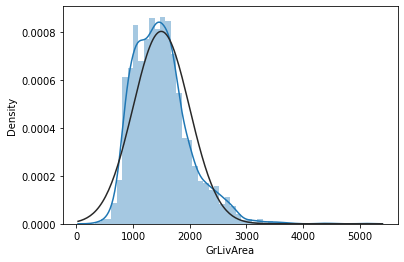

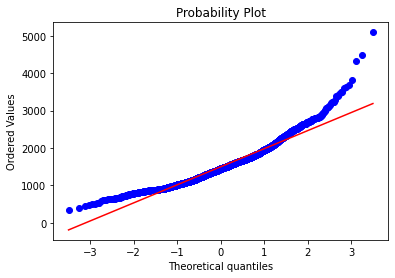

In [16]:
#histogram and normal probability plot
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

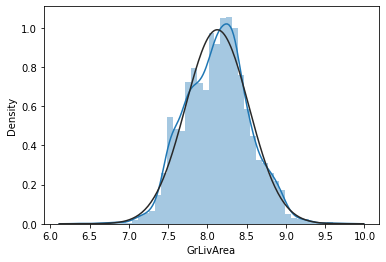

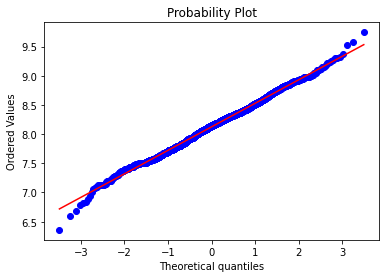

In [17]:
#histogram and normal probability plot
sns.distplot(boxcox1p(data['GrLivArea'],boxcox_normmax(data['GrLivArea']+ 1)), fit=norm);
fig = plt.figure()
res = stats.probplot(boxcox1p(data['GrLivArea'],boxcox_normmax(data['GrLivArea']+ 1)), plot=plt)

#### Áp dụng biến đổi Box-Cox cho tất cả trường dữ liệu có chỉ số skew lớn hơn 0.5

In [18]:
## Áp dụng  Box-Cox transform thay vì log1p transform
transform = boxcox1p
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in data.columns:
    if data[i].dtype in numeric_dtypes:
        numerics.append(i)
skew_features = data[numerics].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    data[i] = transform(data[i], boxcox_normmax(data[i] + 1))

### Tạo những cột feature mới 

 #### Từ thông tin nếu 'YearRemodAdd' (Năm tu sửa) == 'YearBuilt' (Năm xây dựng) ==> Nhà không tu sửa. Tạo cột dữ liệu nhà có tu sửa hay không ?

In [19]:
 data['YrBltdiffRemod'] = (data['YearBuilt']==data['YearRemodAdd'])*1

#### Tạo cột dữ liệu tổng diện tích nhà ở bằng tổng diện tích tầng hầm, tầng 1 và tầng 2. 

In [20]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [21]:
## total footage
data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] +
                                 data['1stFlrSF'] + data['2ndFlrSF'])

In [22]:
#total bathroom 
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

In [23]:
## total porch
data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                              data['EnclosedPorch'] + data['ScreenPorch'] +
                              data['WoodDeckSF'])

#### Từ dữ liệu diện tích các hạng mục nhà, tạo những trường dữ liệu mới. Ví dụ: có bể bơi hay không?, có tầng 2 hay không , etc, ...  

In [24]:
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

#### Tạo trường dữ liệu năm sử dụng = năm bán - năm xây dựng

In [25]:
data['YearBuiltDur'] = data['YrSold'] - data['YearBuilt']
data['YearRemodAddDur'] = data['YrSold'] - data['YearRemodAdd']
data['GarageYrBltDur'] = data['YrSold'] - data['GarageYrBlt']


# <a id='1.1*'>1.1*. Xử lý trường dữ liệu phân loại </a>


### Các bước xử lý : 
   + Xóa các trường dữ liệu có chênh lệch data lớn dễ gây overfitting dữ liệu.
   + Những trường phân loại mang tính đánh giá chất lượng, sử dụng label encoding dựa trên chất lượng.
   + Ở trường phân loại có những dữ liệu có tần suất xuất hiện thấp, gộp chung các phân loại này thành một. 
   + One hot encoding các trường dữ liệu còn lại.
   

#### Quan sát các trường dữ liệu phân loại  

In [26]:
categorical_features = data.select_dtypes(exclude=[np.number])
categorical_columns = categorical_features.columns
data[categorical_columns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


#### Xóa những cột dữ liệu phân loại có sự chênh lệch quá cao về quy mô giữa các phân lớp dữ liệu

In [27]:
overfit = []
for i in data.columns:
    counts = data[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(data) * 100 > 99:
        overfit.append(i)
overfit = list(overfit)
print(overfit)
data = data.drop(overfit, axis=1)

['Street', 'Utilities', 'Condition2', 'PoolArea', 'PoolQC', 'haspool']


#### Label encoding các trường dữ liệu có tính chất thứ tự 

In [28]:
def clean_LotShape(x):
    if x == 'Reg':
        return 4
    elif x == 'IR1' :
        return 3
    elif x == 'IR2' :
        return 2
    else :
        return 1
data['LotShape'] = data['LotShape'].apply(clean_LotShape)

In [29]:
def clean_ExterCond(x):
    if x == 'Ex':
        return 5
    elif x == 'Gd' :
        return 4
    elif x == 'TA' :
        return 3
    elif x == 'Fa' :
        return 2
    elif x == 'Po' :
        return 1
    else:
        return 0
data['ExterCond'] = data['ExterCond'].apply(clean_ExterCond)

In [30]:
def clean_ExterQual(x):
    if x == 'Ex':
        return 5
    elif x == 'Gd' :
        return 4
    elif x == 'TA' :
        return 3
    elif x == 'Fa' :
        return 2
    elif x == 'Po' :
        return 1
    else:
        return 0

data['ExterQual'] = data['ExterQual'].apply(clean_ExterQual)


In [31]:
def clean_BsmtQual(x):
    if x == 'Ex':
        return 5
    elif x == 'Gd' :
        return 4
    elif x == 'TA' :
        return 3
    elif x == 'Fa' :
        return 2
    elif x == 'Po' :
        return 1
    else:
        return 0
data['BsmtQual'] = data['BsmtQual'].apply(clean_BsmtQual)


In [32]:
def clean_BsmtCond(x):
    if x == 'Ex':
        return 5
    elif x == 'Gd' :
        return 4
    elif x == 'TA' :
        return 3
    elif x == 'Fa' :
        return 2
    elif x == 'Po' :
        return 1
    else:
        return 0
data['BsmtCond'] = data['BsmtCond'].apply(clean_BsmtCond)

In [33]:
def clean_BsmtFinType1(x):
    if x == 'GLQ':
        return 6
    elif x == 'ALQ' :
        return 5
    elif x == 'BLQ' :
        return 4
    elif x == 'Rec':
        return 3
    elif x == 'LwQ':
        return 2
    elif x == 'Unf':
        return 1
    else:
        return 0   
data['BsmtFinType1'] = data['BsmtFinType1'].apply(clean_BsmtFinType1)

In [34]:
def clean_BsmtFinType2(x):
    if x == 'GLQ':
        return 6
    elif x == 'ALQ' :
        return 5
    elif x == 'BLQ' :
        return 4
    elif x == 'Rec':
        return 3
    elif x == 'LwQ':
        return 2
    elif x == 'Unf':
        return 1
    else:
        return 0
    
data['BsmtFinType2'] = data['BsmtFinType2'].apply(clean_BsmtFinType2)

In [35]:
def clean_HeatingQC(x):
    if x == 'Ex':
        return 5
    elif x == 'Gd' :
        return 4
    elif x == 'TA' :
        return 3
    elif x == 'Fa' :
        return 2
    elif x == 'Po' :
        return 1
    else:
        return 0
    
data['HeatingQC'] = data['HeatingQC'].apply(clean_HeatingQC)

#### Nhóm các dữ liệu có tần suất xuất hiện thấp thành một phân lớp

In [36]:
def group_rare_value(df, frequency_threshold=15):
    '''
    Replace value of categorical columns in df by 'rare_value
    if the frequency of the value in df_ref is smaller than frequency_threshold
    '''
    col_list = list(df.dtypes[df.dtypes == 'object'].index)
    for col in col_list:
        value_counts = df[col].value_counts()
        if(len(value_counts[value_counts < frequency_threshold]) > 0):
            rare_values = value_counts[value_counts < frequency_threshold].index
            for rare_value in rare_values:
                df.loc[df[col] == rare_value, col] = 'rare_value'
    return df

In [37]:
data = group_rare_value(data, frequency_threshold = 15)

In [38]:
data.shape[1]

86

#### One-hot-encoding các trường dữ liệu còn lại

![onehot](https://i.imgur.com/TW5m0aJ.png)

In [39]:
data = pd.get_dummies(data)
print(data.shape)

(2917, 235)


### Sử dụng các thuật toán lightgbm cùng các tham số như tuần 1. 

#### log1p giá trị trường target

In [40]:
target = np.log1p(train['SalePrice'].values)

#### Chia lại tập train và test sau khi xử lý toàn bộ dữ liệu 

In [41]:
train_set = data[:ntrain]
test_set = data[ntrain:]

#### Tham số và hàm số huấn luyện của thuật toán lightgbm trên một fold

In [42]:
## parameters of lightgbm 
params = {
        "objective" : "regression",
        "metric" : "rmse",
        "max_bin" : 200,
        "num_leaves" : 8,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.75,
        "bagging_freq" : 5,
        "bagging_seed" : 7,
        "feature_fraction" :0.5,
        "feature_fraction_seed": 7,       
        "verbosity" : -1 } 
def single_fold_lgb(train_X, train_y, valid_X, valid_y, params):    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(valid_X, label=valid_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 2000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=200, evals_result=evals_result)
    return model

In [43]:
kf = KFold(n_splits=5, shuffle = True, random_state = 2020)
def kfold_model_lgb(params):
    oof_preds = np.zeros(train_set.shape[0]) ## out of fold prediction 
    for train_index, valid_index in kf.split(train_set):
        X_train , X_valid  = train_set.loc[train_index,:], train_set.loc[valid_index,:]
        y_train, y_valid = target[train_index], target[valid_index]
        model = single_fold_lgb(X_train, y_train, X_valid, y_valid, params) ## get testing prediction and model  
        oof_preds[valid_index] = model.predict(train_set.loc[valid_index,:],num_iteration=model.best_iteration)  # prediction of out of fold
    print('Full Out-Of-Fold score : %9.6f'% (mean_squared_error(target, oof_preds) ** .5))
    return oof_preds

oof_preds = kfold_model_lgb(params)

Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.155381
[400]	valid_0's rmse: 0.124352
[600]	valid_0's rmse: 0.119188
[800]	valid_0's rmse: 0.117491
[1000]	valid_0's rmse: 0.116552
[1200]	valid_0's rmse: 0.116087
[1400]	valid_0's rmse: 0.115781
Early stopping, best iteration is:
[1337]	valid_0's rmse: 0.115651
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.170159
[400]	valid_0's rmse: 0.134041
[600]	valid_0's rmse: 0.124464
[800]	valid_0's rmse: 0.121412
[1000]	valid_0's rmse: 0.120399
[1200]	valid_0's rmse: 0.119827
Early stopping, best iteration is:
[1172]	valid_0's rmse: 0.119753
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.162125
[400]	valid_0's rmse: 0.128809
[600]	valid_0's rmse: 0.121635
[800]	valid_0's rmse: 0.119814
[1000]	valid_0's rmse: 0.118638
[1200]	valid_0's rmse: 0.118273
Early stopping, best iteration is:
[1140]	valid_0's rmse: 0.118193
Training until va

### So sánh với kết quả tuần trước, kết quả đạt tốt hơn với những feature mới, đạt 0.1185

# Các thuật toán thường được dùng khi xây dựng mô hình regression 
+ [Linear regression](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)
+ [Lasso Regression](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)
+ [Ridge Regression](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)
+ [Elastic Net Regression](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)
+ [Gradient Boosting regression](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html)
+ [CatBoostRegressor](https://catboost.ai/docs/concepts/python-reference_catboostregressor.html)
+ [Xgboost](https://xgboost.readthedocs.io/en/latest/parameter.html)
+ [Lightgbm](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html)

# <a id='2*'>2*. Lightgbm và Bayesian Optimization  </a>

## <a id='2.1*'>2.1*. Giới thiệu tổng quan về Lightgbm  </a>
  

### Bagging and Boosting 

<img src="https://previews.dropbox.com/p/thumb/AA9u79dvTaurp3eMBELe0iYZxZI5ng60dxq4rKCBo6qGAwTevpimCvZfxN_cy644zZguhU1p6Lph9uaFtgKzYjNR2EPYAGDqrbJ3XrSGu6HDCWQTYLX0TzeqamsdMiKp5PA_3Ek9sS26QUW6XCyt6SH56-7SC4wqpi-YwBah2T0Vu5n-UhVAjK9KRWMMfD-7e-eWLZ568XzT7BWuSAgmX9UfnMbzBJXcpfdfgtILnao6Dk0eI_TXX-F0nTwNMKKqqK_cT5qmRQkBH2_5EoU4XcBI95PNpzuzLEpf3U2kJrqnmnOvJURrtRFG4Z9TwNxO-xJctAUxgpkXJV6oOx184Pk67_rlyF7I7zRx_DYuhFELVA/p.png?fv_content=true&size_mode=5" alt="drawing" width="500"/>


+ **Bagging** và **Boosting** đều là thuật toán học giám sát dựa vào nguyên lý tập hợp (ensembling): Xây dựng thuật toán cuối cùng ( gọi là strong learner) dựa vào tổng hợp các thuạt toán nhỏ hơn ( gọi là weak learners)

------

+ **Bagging**: các thuật toán con được xây dưng một cách song song không phụ thuộc vào nhau. Dữ liệu huấn luyện của các mô hình con là dữ liệu bất kì trong dữ liệu huấn luyện gốc (lấy một cách bất kì theo cách lấy vật trong túi - **bagging**) 

------

+ **Boosting**: Xây dựng thuật toán mạnh dựa vào chuỗi (sequence) các thuật toán yếu và có cập nhật trọng số (update weight) vào dữ liệu. Mỗi thuật toán con có liên kết với thuật toán trước và sau đó, thúc đẩy độ chính xác hơn (**boosting**).

<img src="https://previews.dropbox.com/p/thumb/AA9ghBXHb-543MtCfiA7Kc_z5kTf-4PiTuSOgvUJoWOLSaKZ8J9prNNQmJnqNugqIKBkSiqZRNo7ahcu2q8GVu33tSIq1waBuuSDG08KcdMNXf5kY1Yrfh6z-M0otgPXEi0iHbwk9GvtbvPdZVA4VTaNvnLXuN1x0sukbI9a1IqfBVcxp9etogD4cqGCeGsmFYrBA5dY36upEA_3iva1KuYqZjmtgMg7bYEbNs-yToZ71nGffShS_ADj_16ibVt7Dpx_Rp8SNt6FzNaz_yHr2aKwZHwVRehPePZLiXMEnySfLtjjVDZ5edWkN_-CqBxwSfXHXjbbjNxeeHShqniUZMGinB9MKctNU41aNhzonrDrKg/p.png?fv_content=true&size_mode=5" alt="drawing" width="600"/>

**Hình mô tả nguyên lý thuật toán Bagging** - các tập dữ liệu được lấy một cách độc lập và mô hình con được huấn luyện độc lập với nhau

<img src="https://previews.dropbox.com/p/thumb/AA9xNCAVSRT8evVqPWijJOLShd2BK7TxP9Q7ySd5uXBgjRQs1c_QMGkIzXvRkGbTrleDj8QhYU8watCUplim_zAbQPvawwpIByugp8z03l8JBKd2AaUZ-ba5aW65wcVwVtOT3lfJuHNGnvXJyixgOscAizJfFY5ShS8jIxo9Uia-owG2O5Wy9Jape2HjF-OdfKSlwNQiCvnIELF-_NY45rLOsVtS8EFoqq4PNS7piLFXlQGaPgvxzPTAwCsWlUpJKfTSdOTr_24WLV_oUfUrFFgYWsAyhE6nvIF0MLUi30HspAWJSetP0yXElrTkTF3f8yA5tNyxo04dMMbMuHXTpvL0ScbXoz1JCsu1S2uggqSdwQ/p.png?fv_content=true&size_mode=5" alt="drawing" width="600"/>

**Hình mô tả nguyên lý thuật toán Boosting** -Các mô hình con có mối quan hệ sequence với nhau, dữ liệu được update trọng số sau mỗi lần huấn luyện tập con 

<img src="https://previews.dropbox.com/p/thumb/AA9R_1AEm4uotg_QVJXWPa7rsJokf2xvPk2MSZn9dcQUIRjaOrmslYi3SFXQ3gyrGTUwIhpixgkID5HlZZJl2kFp4AWA-v-S39sX-Z82ygHKRg1Cm_X5J5Bu3WWDHuwv73HWg6IxNjOeX_ZUbKxIF0W125m4OMEzgR96k-2RDjXbU1YkfQ3zuKoPnFWJeWfRkNHtQdpBegwqe6sQre6b_U2b9xnErgvQXgW80uqesmbgKK0QkLJXjLg1ozi30o317aeBOq5L5uQqvDw6Jcg9im5N8I7Cpl3XKJe4K6dKJbn1JcIYJ6_loatoFLJgXIvpb6SwnXae7rsUbiEh6OVaieoRBTyaxaGnHDFKV0xK670u-A/p.png?fv_content=true&size_mode=5" alt="drawing" width="500"/>

**Ví dụ điển hình nguyên lý bagging: Random forest** là thuật toán dùng nguyên lý  bagging và sử dụng decision tree ở mỗi thuật toán con (weak learners)

<img src="https://previews.dropbox.com/p/thumb/AA-bkONdbZAYj7SQLpYEj83_rQ0NA32_Y1ip_nMnzqMa8Y3Es-CgG4Ixhk5edqOBhwfdxTQZpWwHfwiGfR4pQA9whGm2NnMdvuHbkhKl25qrBSXIYUg4criXWRXhXM6ik5b2n_8fzoF_D--4XAxoZfIDnk8qD0H6eGV-ILFxNXRb1U1vGBvfiZe6k7CziO-baXpUpXP9hRiScw3batblK63NvKSOgMru_F-BO6tp0IA4wFLRfM3g9f4reH2omtNsfRZMd9FBCm4Uy2Ga0I4t9MaZeCMeNCa0yOKf9MvWXhItAQCqlcawyNTSfj9TUYy6gbsCAmylQjVrAXPEns_Gg5y1k0SAX0ywJ-pltkWdeWVXVA/p.png?fv_content=true&size_mode=5" alt="drawing" width="600"/>

**Ví dụ điển hình nguyên lý boosting : Adaboost** (Adaptive + Boosting) - là thuật toán dùng nguyên lý boosting và sử dụng weak learner là decision tree.

##  Tổng quan Adaboost and Gradient Boosting

+ Giống nhau: Đều dựa vào nguyên lý Boosting 
+ Khác nhau : Cách tạo ra thuật toán con (weak learners) trong các bước lặp 

### Adaboost = Adaptive + Boosting                        


<img src="https://previews.dropbox.com/p/thumb/AA-bkONdbZAYj7SQLpYEj83_rQ0NA32_Y1ip_nMnzqMa8Y3Es-CgG4Ixhk5edqOBhwfdxTQZpWwHfwiGfR4pQA9whGm2NnMdvuHbkhKl25qrBSXIYUg4criXWRXhXM6ik5b2n_8fzoF_D--4XAxoZfIDnk8qD0H6eGV-ILFxNXRb1U1vGBvfiZe6k7CziO-baXpUpXP9hRiScw3batblK63NvKSOgMru_F-BO6tp0IA4wFLRfM3g9f4reH2omtNsfRZMd9FBCm4Uy2Ga0I4t9MaZeCMeNCa0yOKf9MvWXhItAQCqlcawyNTSfj9TUYy6gbsCAmylQjVrAXPEns_Gg5y1k0SAX0ywJ-pltkWdeWVXVA/p.png?fv_content=true&size_mode=5" alt="drawing" width="600"/>



#### Adaboost: Mẫu dữ liệu huấn luyện được thay đổi qua từng bước lặp , tăng trọng số ở mẫu đoán sai, giảm trọng số ở mẫu đoán đúng giúp mô hình con tiếp theo học tốt hơn)

<img src="https://previews.dropbox.com/p/thumb/AA8-vvmsp6_xCh5-WRLbxqx12XnJvY5ge_-p7fZr63isuDLDgiDUsIc0cXi9u9Ok6SY5st8X9uwyV-llbcTbIm4s1WbrHUfDhobSe8H4X0VF0_0TtgXTnueS3X9qINzoZSOP0XFWsWAziEQDSRXEqI3WdS4lLw7vP2FauPVqc5ztcmp5SYGRz6kdZ8WYiHaOjk72U7UzSFjmKgSzc7EzN2_itdLnKGw3E3elk5xD2KUCKCz_xu6XlYsQB02uvvqFDLe7A79cO4Pi1vjObcfSJD3MPrU9QtnK2XhU0fcKYJC5Vnr_jHuYkpA6Swj68Fus6z8wOqWMOFVPK_MWbHpIymu1DJZHYC5hx5QxAGGYoLuY6Q/p.png?fv_content=true&size_mode=5" alt="drawing" width="600"/>



#### Adaboost: Mô hình huấn luyện cuối cùng được kết hợp từ những weak learners

### Gradient Boosting = Gradient Descent + Boosting 

Hình mô tả nguyên lý hoạt động của Gradient Boosting 

<img src="https://previews.dropbox.com/p/thumb/AA-NXdkx6SBpUUMMihd8vBhW6K7dz7eDw_MffswUDh4MAFnorMIBq71p8sv9FZf88Fy64IvCmEld8aaGwM6aouwWpHdg1QjvIwsIQqbQLL4mjJvZzA6ZRjRXsA66S4gUzCCI3vbfUPws9JxSrI7xF1wMdvGepZTE_6qyeqbtPdOVqLH2kDO6fjDnBCqTORZ_JZRbiH3hz2KpmOtD2VghaCqBQIFUCmF008GNhjL9Lf1ZifnaKaJZktg2ut3Eqqdt5s0zRC39YpdFZsfdYceSx2K8fYQeYxsjZbQYeQilLpJulH8urp5PFv6s_ItTWsXz18zUD2WXyWkiooBLgQ-hGLlgVg27V6ffXJykcH4qPyDupg/p.png?fv_content=true&size_mode=5" alt="drawing" width="600"/>

#### Gradient Boosting : Không thay đổi mẫu huấn luyện (không có quá trình update trọng số  của mẫu dữ liệu huấn luyện). 
#### Định nghĩa hàm loss (để tính toán sai lệch), tại mỗi bước lặp sử dụng gradient descent để update mô hình weak learner. 

<img src="https://previews.dropbox.com/p/thumb/AA-mihsb_4AtI6OJOH4EM0v88qsmZyT3Rjm5UuC6qkCSIriVVpTiwdUgWks8ymCHHH0j3ORqFUKeMBGyAw-N_a_mKteCiNo8naU8iGjtHURdPXNeqNwmG5Rgt9TuUWrIqruC17w93INp9QlQ2QO8KmWBDHvCbezqUB6kB5cuyT6ymT7-sFb87IM2Z-Hs3cSVpep2_sbXM5mFddx4Z7pOuI6l46G9RTVkmNqDCaB0HLiJJ73Xuy8l5Q5HpflDLr8dD6Pv1O-jHr-91PDiEsgQyILwMe6Xx4chuhgIAzrLRpEBfFgwpXiGG3NLjwZnPYrPkvwperC8zVulioSaE01ffbt1Mpk1yonN-ph3TlDxDexfsQ/p.png?fv_content=true&size_mode=5" alt="drawing" width="400"/>

## Lightgbm - Xgboost 

+ Đều là các thuật toán xây dựng trên nền tảng của Gradient Boosting.

---------

+ Khác biệt lớn nhất với thuật toán Gradient Boosting thông thường: Ở mỗi bước lặp, khi tối ưu hàm thất thoát, sử dụng thuật toán tối ưu bậc hai, e.g.: Newton, quasi-Newton (các thuật toán khác thường bậc 1) dẫn tới kết quả tối ưu tốt hơn. 

---------
+ Điểm khác nhau của  Lightgbm - Xgboost  ở cách chia lá ở thuật toán weak learner: Thuật toán cây của Lightgbm phát triển cây theo chiều dọc trong khi thuật toán Xgboost phát triển cây theo chiều ngang




![](./imgs/xgboost-lightgbm.jpg)


## Các tham số quan trọng của Lightgbm


+ num_leaves: số lượng lá cần sử dụng trong thuật toán. num_leaves lớn sẽ cải thiện độ chính xác, nhưng num_leaves lớn sẽ gây nên hiện tượng overfitting
+ min_child_samples: Số lượng mẫu (dữ liệu) tối thiểu để nhóm thành một lá. Tham số có thể hỗ trợ rất nhiều việc chống overfitting: min_child_samples lớn trên mỗi lá sẽ làm giảm hiện tượng overfitting (nhưng đồng thời có thể dẫn đến underfitting nếu số min_child_samples quá lớn).
+ max_depth: Tham số này nhằm kiểm soát độ sâu của lá. Tham số max_depth thấp tương ứng với cây không bị chia quá phức tạp, giúp cho mô hình chống overfitting

### Tham số thay đổi để tăng độ chính xác (theo documentation của [lightgbm](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html) ) : 
+ max_bin: Sử dụng  max_bin lớn có thể tăng độ chính xác (nhưng tốc độ huấn luyện có thể chậm hơn)
+ learning_rate: Sử dụng learning_rate nhỏ cùng số bước lặp (num_iterations) lớn có thể tăng độ chính xác
+ Sử dụng num_leaves lớn có thể tăng độ chính xác (nhưng cũng có thể gây nên overfitting)


### Một số phương án hiệu chỉnh tham số để  tránh hiện tượng overfitting 
+ Sử dụng max_bin nhỏ 
+ Sử dụng num_leaves nhỏ 
+ bagging_fraction: cho phép kiểm soát việc lấy mẫu con dữ liệu khi huấn luyện mô hình. Ví dụ bagging_fraction = 0.5 nghĩa là mỗi bước lặp sẽ lấy 50% dữ liệu để tiến hành chia lá. bagging_fraction nhỏ có thể giúp tránh được overfitting.
+ feature_fraction: kiểm soát việc lấy mẫu con ở các trường dữ liệu khi tiến hành huấn luyện. feature_fraction nhỏ hơn có thể giúp mô hình giảm overfitting.
+ Sử dụng tham số lambda_l1, lambda_l2 và min_gain_to_split để chính quy hoá (regularization).
+ Sử dụng max_depth để kiểm soát độ sâu của nhánh khi chia lá.

In [44]:
## the fucntion for hidden print
class HiddenPrints:
    '''To hide all the printouts'''

    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

## <a id='2.2*'>2.2*. Giới thiệu tổng quan về tối ưu Bayes ([Bayesian Optimization](https://thetalog.com/thetaflow/bayesian-optimization-visualizer/?fbclid=IwAR1soc93sJ-b5nAC5dxxJ95Im3YrA3K3SXTNIoDPzZ3SBag0-jyj4zSHl88))  </a>

#### Tối ưu hóa Bayes là một chiến lược thiết kế tuần tự để tối ưu hóa toàn cục của các hàm số mà chúng ta không hiểu rõ tính chất (black-box-function).

Sử dụng gói thư viện BayesianOptimization

In [45]:
from bayes_opt import BayesianOptimization

### Ví dụ cơ bản gói thư viện BayesianOptimization

Giả sử chúng ta có black box function như ở dưới. 

$$ f(x,y) = -x^2 -(y-1)^2 +1 $$

Ở đây chúng ta hiểu rõ tính chất hàm \(f\). Nhưng ở ví dụ này chúng ta giả sử không biết rõ về hàm \(f\) và chúng ta muốn tìm 

$$Max_{x,y} f(x,y)$$

 với $x\in (2,4)$, và $y \in (-3,3)$

Chúng ta định nghĩa black box function và grid_search

In [46]:
def black_box_function(x, y):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    return -x ** 2 - (y - 1) ** 2 + 1

In [47]:
grid_search = {'x': (2, 4), 'y': (-3, 3)}

### Sử dụng tối ưu Bayes nhờ thư viện BayesianOptimization. Hàm BayesianOptimization gồm 2 tham số quan trọng: 
   +  f: Hàm black-box
   +  pbounds : Không gian cần tìm kiếm 

In [48]:
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=grid_search,
    random_state=1,
)

#### Để tìm giá trị max của hàm black-box trong khảng giá trị $(2,4)\times (-3,3)$ chúng ta  sử dụng lệnh 

In [49]:
optimizer.maximize(init_points=5,n_iter=5)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -7.135    |  2.834    |  1.322    |
|  2        | -7.78     |  2.0      | -1.186    |
|  3        | -16.13    |  2.294    | -2.446    |
|  4        | -8.341    |  2.373    | -0.9266   |
|  5        | -7.392    |  2.794    |  0.2329   |
|  6        | -15.02    |  4.0      |  0.8624   |
|  7        | -3.799    |  2.184    |  0.83     |
|  8        | -5.343    |  2.0      |  2.531    |
|  9        | -14.29    |  3.36     |  3.0      |
|  10       | -3.363    |  2.0      |  1.603    |


#### Giá trị tốt nhất sử dụng tối ưu bayes đạt: $-3.363$ khi $x=2$, và $y = 1.6$

## <a id='2.2*'>2.2*. Áp dụng tối ưu bayes để tìm kiếm tham số tối ưu cho thuật toán lightgbm  </a>

#### Ở đây chúng ta sẽ áp dụng "giá trị tốt nhất trên cross-validation của thuật toán lightgbm" như hàm  black-box 
#### Grid_seach là  không gian các tham số muốn tối ưu cho thuật toán lightgbm

Cụ thể: 
+ hàm black-box sẽ là hàm số "kfold_model_gbm" ở mục trước 
+ grid_seach sẽ bao gồm 
    + 'feature_fraction': (0.1, 0.9),
    + 'max_depth': (4, 8),
    + 'num_leaves' : (4,16),
    + 'max_bin' : (50,200),
    + 'learning_rate' : (0.01, 0.1)

In [50]:
def bayes_parameter_opt_lgb(train_set, target, init_round=15, opt_round=25 ,output_process=False):
    # prepare data
    kf = KFold(n_splits=5, shuffle = True, random_state = 2020)
    def single_fold_lgb(train_X, train_y, valid_X, valid_y, params): 
        """
        args: 
        + train   : training dataset 
        + train_y : target of training dataset
        + valid   : validation dataset
        + valid_y : target of validation dataset
        +params   : important parameters of lgb model 
        output:
        model after training with training dataset 
        """
        lgtrain = lgb.Dataset(train_X, label=train_y)
        lgval = lgb.Dataset(valid_X, label=valid_y)
        evals_result = {}
        model = lgb.train(params, lgtrain, 2000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=200, evals_result=evals_result)
        return model
    
    grid_search =  {'feature_fraction': (0.1, 0.9),
                    'max_depth': (4, 8),
                    'num_leaves' : (4,16),
                    'max_bin' : (50,200),
                    'learning_rate' : (0.01, 0.1)}
    
    def kfold_model(feature_fraction, max_depth, num_leaves, max_bin,learning_rate):
        """
    
        args: 
        + all parameters we want to search for the lightgbm model. Here, we want to tune : 
        feature_fraction, max_depth, num_leaves, max_bin, learning_rate.
        ouput:
        The value we want to get maximum when we apply baysian optimization. 
        Here we use the MNLSE metric, then the output should be -MNLSE of the validation dataset. 
    
        """
        oof_preds = np.zeros(train_set.shape[0]) ## out of fold prediction 
        ## define parameters
        params = {
        "objective" : "regression",
        "metric" : "rmse",
        "max_bin" : 100,
        "num_leaves" : 8,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.75,
        "bagging_freq" : 5,
        "bagging_seed" : 7,
        "feature_fraction" :0.2,
        "feature_fraction_seed": 7,       
        "verbosity" : -1 }
        # update parameter search 
        
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['num_leaves'] = int(round(num_leaves))
        params['max_bin'] = int(round(max_bin))
        params['learning_rate'] = learning_rate
        
        for train_index, valid_index in kf.split(train_set):
            X_train , X_valid  = train_set.loc[train_index,:], train_set.loc[valid_index,:]
            y_train, y_valid = target[train_index], target[valid_index]
            with HiddenPrints():
                model = single_fold_lgb(X_train, y_train, X_valid, y_valid, params) ## get testing prediction and model  
            oof_preds[valid_index] = model.predict(train_set.loc[valid_index,:],num_iteration=model.best_iteration)  # prediction of out of fold
        score = -(mean_squared_error(target, oof_preds) ** .5)
        return score
    
    optim = BayesianOptimization(kfold_model, grid_search , random_state=0)
    # optimize
    optim.maximize(init_points=init_round, n_iter=opt_round,acq='ei')
    # output optimization process
    if output_process == True: optim.points_to_csv("./data/bayes_opt_result.csv")

    return optim

In [51]:
optim = bayes_parameter_opt_lgb(train_set, target, init_round=15, opt_round=25 ,output_process=False)

|   iter    |  target   | featur... | learni... |  max_bin  | max_depth | num_le... |
-------------------------------------------------------------------------------------
|  1        | -0.1203   |  0.5391   |  0.07437  |  140.4    |  6.18     |  9.084    |
|  2        | -0.1205   |  0.6167   |  0.04938  |  183.8    |  7.855    |  8.601    |
|  3        | -0.1193   |  0.7334   |  0.0576   |  135.2    |  7.702    |  4.852    |
|  4        | -0.1183   |  0.1697   |  0.01182  |  174.9    |  7.113    |  14.44    |
|  5        | -0.1205   |  0.8829   |  0.08192  |  119.2    |  7.122    |  5.419    |
|  6        | -0.1186   |  0.6119   |  0.0229   |  191.7    |  6.087    |  8.976    |
|  7        | -0.1193   |  0.3116   |  0.07968  |  118.4    |  6.274    |  4.225    |
|  8        | -0.1197   |  0.5941   |  0.06509  |  142.5    |  7.775    |  12.18    |
|  9        | -0.1182   |  0.3876   |  0.04933  |  154.6    |  4.241    |  12.0     |
|  10       | -0.1197   |  0.6365   |  0.02893  |  69.

### In ra các các tham số  tối ưu

In [55]:
print(optim.max)

{'target': -0.11719952351472296, 'params': {'feature_fraction': 0.22717566691641577, 'learning_rate': 0.019933762704787465, 'max_bin': 148.44943841979102, 'max_depth': 4.552731805394455, 'num_leaves': 6.358988340160642}}


## Kiểm tra lại kết quả

#### Sử dụng lại Kfold và tham số của mô hình tuần 1. 

In [56]:
kf = KFold(n_splits=5, shuffle = True, random_state = 2020)
params = {
        "objective" : "regression",
        "metric" : "rmse",
        "max_bin" : 148,
        "num_leaves" : 8,
        "learning_rate" : 0.02,
        "bagging_fraction" : 0.75,
        "bagging_freq" : 5,
        "bagging_seed" : 7,
        "feature_fraction" :0.5,
        "feature_fraction_seed": 7,       
        "verbosity" : -1 }

#### Update tham số cần tối ưu

In [57]:
params['feature_fraction'] = max(min(optim.max["params"]["feature_fraction"], 1), 0)
params['max_depth'] = int(round(optim.max["params"]["max_depth"]))
params['num_leaves'] = int(round(optim.max["params"]["num_leaves"]))
params['max_bin'] = int(round(optim.max["params"]["max_bin"]))
params['learning_rate'] = optim.max["params"]["learning_rate"]

#### Chạy lại mô hình dựa trên Kfold và tham số ở trên 

In [58]:
oof_preds = kfold_model_lgb(params)

Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.12988
[400]	valid_0's rmse: 0.11911
[600]	valid_0's rmse: 0.117124
[800]	valid_0's rmse: 0.116261
[1000]	valid_0's rmse: 0.115754
Early stopping, best iteration is:
[952]	valid_0's rmse: 0.115673
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.140574
[400]	valid_0's rmse: 0.122653
[600]	valid_0's rmse: 0.119384
[800]	valid_0's rmse: 0.117754
[1000]	valid_0's rmse: 0.117179
[1200]	valid_0's rmse: 0.116663
[1400]	valid_0's rmse: 0.116203
Early stopping, best iteration is:
[1489]	valid_0's rmse: 0.116041
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.134852
[400]	valid_0's rmse: 0.120704
[600]	valid_0's rmse: 0.117466
[800]	valid_0's rmse: 0.115958
[1000]	valid_0's rmse: 0.115579
Early stopping, best iteration is:
[1045]	valid_0's rmse: 0.115488
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 

### Sau khi finetune parameter, kết quả trên tập validation đã có những cải thiện đáng kể

# QA